In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import pickle
import joblib

In [77]:
df=pd.read_excel("AI.xlsx")
df

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED,WEIGHT
0,10,6,7,50,1.8
1,10,6,8,50,1.8
2,10,6,9,50,1.9
3,10,6,10,50,1.9
4,10,6,12,50,2.0
...,...,...,...,...,...
175,60,8,7,40,4.9
176,60,8,8,40,4.9
177,60,8,9,40,5.0
178,60,8,10,40,5.0


In [78]:
df.head()

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED,WEIGHT
0,10,6,7,50,1.8
1,10,6,8,50,1.8
2,10,6,9,50,1.9
3,10,6,10,50,1.9
4,10,6,12,50,2.0


In [79]:
df.shape

(180, 5)

In [80]:
df.isnull().sum()

WIDTH          0
BAYSPACINGS    0
CLEARHEIGHT    0
WINDSPEED      0
WEIGHT         0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WIDTH        180 non-null    int64  
 1   BAYSPACINGS  180 non-null    int64  
 2   CLEARHEIGHT  180 non-null    int64  
 3   WINDSPEED    180 non-null    int64  
 4   WEIGHT       180 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 7.2 KB


In [82]:
df.describe()

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED,WEIGHT
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,35.000000,7.000000,9.200000,45.000000,3.620000
std,17.125889,0.818774,1.725264,5.013947,1.065424
min,10.000000,6.000000,7.000000,40.000000,1.700000
25%,20.000000,6.000000,8.000000,40.000000,2.800000
50%,35.000000,7.000000,9.000000,45.000000,3.600000
75%,50.000000,8.000000,10.000000,50.000000,4.700000
max,60.000000,8.000000,12.000000,50.000000,5.400000


In [83]:
df.isnull().sum()

WIDTH          0
BAYSPACINGS    0
CLEARHEIGHT    0
WINDSPEED      0
WEIGHT         0
dtype: int64

C:\Users\CHARUTHA MURARI S\AppData\Local\Temp\ipykernel_15384\3302827146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["WIDTH"])


<Axes: xlabel='WIDTH', ylabel='Density'>

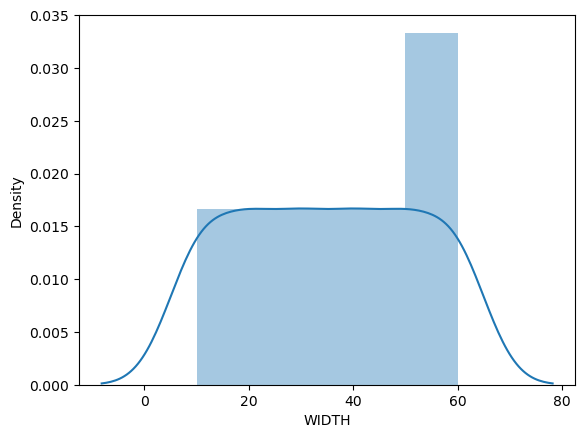

In [84]:
#Data Visualization.
sns.distplot(df["WIDTH"])

In [85]:
df.corr()

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED,WEIGHT
WIDTH,1.000000e+00,-1.051668e-15,-9.646125e-16,-1.294382e-17,0.965986
BAYSPACINGS,-1.051668e-15,1.000000e+00,-1.334784e-16,1.371827e-15,0.156261
CLEARHEIGHT,-9.646125e-16,-1.334784e-16,1.000000e+00,1.686395e-15,0.118775
WINDSPEED,-1.294382e-17,1.371827e-15,1.686395e-15,1.000000e+00,0.047061
WEIGHT,9.659857e-01,1.562608e-01,1.187746e-01,4.706057e-02,1.000000


<Axes: >

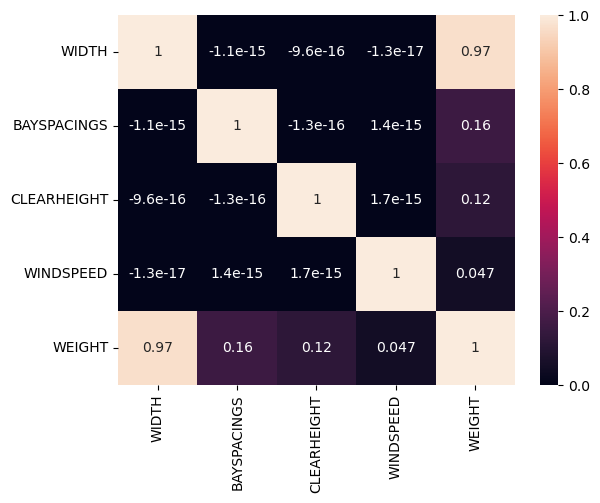

In [86]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

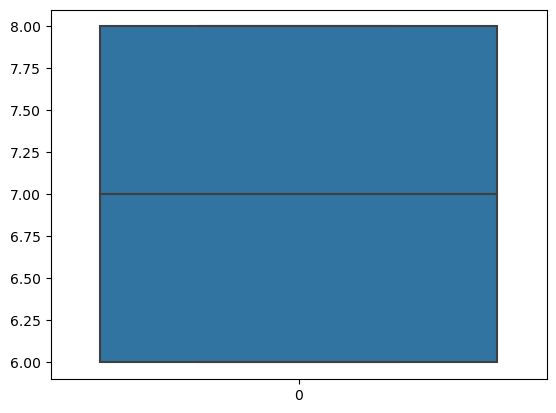

In [87]:
#Check for outliers
sns.boxplot(df.BAYSPACINGS)

<Axes: >

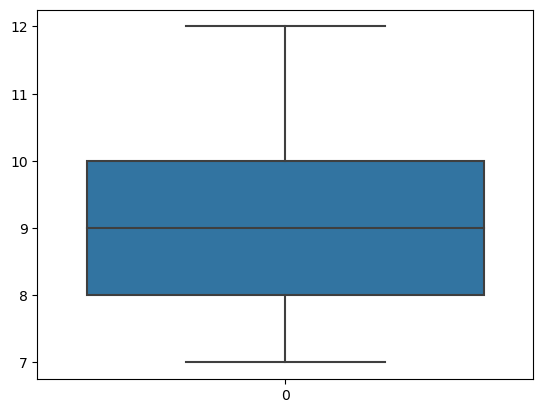

In [88]:
sns.boxplot(df.CLEARHEIGHT)

<Axes: >

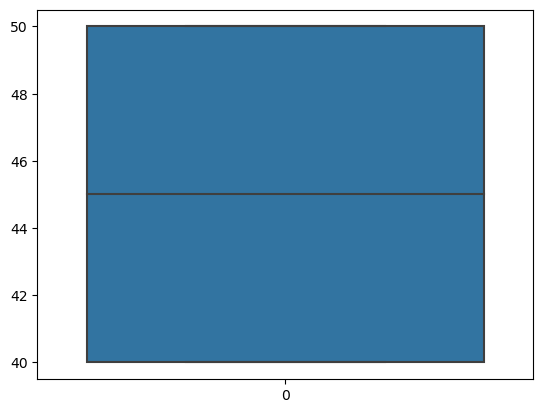

In [89]:
sns.boxplot(df.WINDSPEED)

<Axes: >

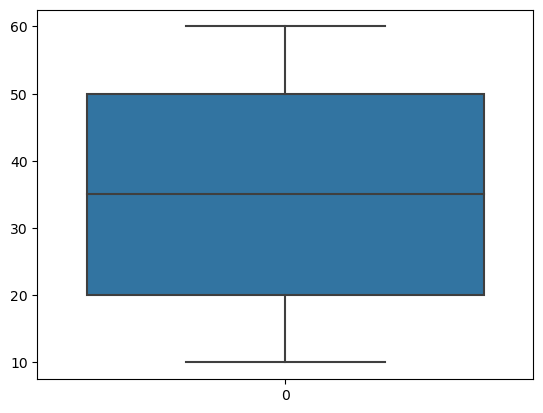

In [90]:
sns.boxplot(df.WIDTH)

<Axes: >

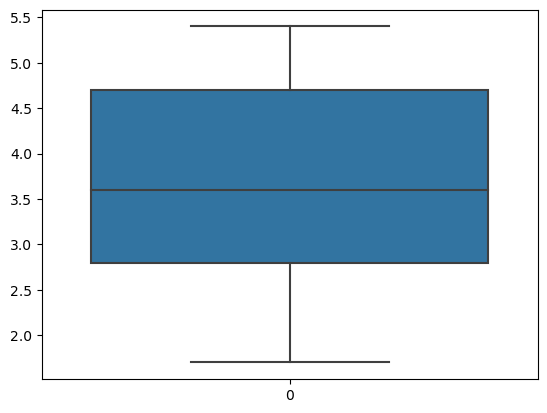

In [91]:
sns.boxplot(df.WEIGHT)

In [92]:
#split dependent and independent variables
df.head()

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED,WEIGHT
0,10,6,7,50,1.8
1,10,6,8,50,1.8
2,10,6,9,50,1.9
3,10,6,10,50,1.9
4,10,6,12,50,2.0


In [93]:
x=df.iloc[:,0:4]
#consider 1st to 4th column
x.head()

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED
0,10,6,7,50
1,10,6,8,50
2,10,6,9,50
3,10,6,10,50
4,10,6,12,50


In [94]:
y=df.WEIGHT
y.head()

0    1.8
1    1.8
2    1.9
3    1.9
4    2.0
Name: WEIGHT, dtype: float64

In [95]:
#using min-max scaler 
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
#when you run this code, everything would be converted to numpy array 
#then we convert it to a DataFrame

In [96]:
x_scaled

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.2,1.0
2,0.0,0.0,0.4,1.0
3,0.0,0.0,0.6,1.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
175,1.0,1.0,0.0,0.0
176,1.0,1.0,0.2,0.0
177,1.0,1.0,0.4,0.0
178,1.0,1.0,0.6,0.0


In [97]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [98]:
x_train.shape,x_train.shape,y_train.shape,y_test.shape

((144, 4), (144, 4), (144,), (36,))

In [99]:
from sklearn.tree import DecisionTreeRegressor

# Using Decision Tree Regressor instead of Classifier
dtr = DecisionTreeRegressor()

# Fit the model on the training data
dtr.fit(x_train, y_train)

# Predict on the test data
y_pred = dtr.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.011944444444444417
R2 Score: 0.9886453657248482


In [100]:
x_train.head()

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED
55,0.6,1.0,0.0,1.0
83,1.0,0.5,0.6,1.0
45,0.6,0.0,0.0,1.0
163,0.8,1.0,0.6,0.0
123,0.4,0.0,0.6,0.0


In [101]:
pred=dtr.predict(x_test)
pred

array([2.5, 1.9, 3.2, 4.7, 3.4, 4.8, 4. , 4.1, 4.9, 2.8, 3.4, 4.8, 4.8,
       1.9, 2.9, 1.9, 5.2, 4.1, 3.3, 2.1, 4.2, 4.1, 4.8, 2.1, 3.2, 4.5,
       2.9, 4.5, 4.8, 4.1, 3.8, 3. , 2.7, 3.6, 4.8, 1.9])

In [102]:
#compare the predicted value with the actual y test values 
y_test

106    2.6
7      2.0
125    3.1
160    4.7
136    3.5
71     4.8
56     4.1
151    4.3
162    4.9
108    2.7
33     3.3
153    4.6
158    4.8
5      1.9
18     2.8
92     1.8
164    5.1
143    4.0
37     3.4
101    2.0
144    4.1
60     4.2
63     4.7
4      2.0
122    3.1
165    4.4
113    2.8
166    4.4
168    4.7
61     4.4
44     3.9
26     3.0
107    2.6
131    3.5
66     4.8
8      2.0
Name: WEIGHT, dtype: float64

In [103]:
df

,WIDTH,BAYSPACINGS,CLEARHEIGHT,WINDSPEED,WEIGHT
0,10,6,7,50,1.8
1,10,6,8,50,1.8
2,10,6,9,50,1.9
3,10,6,10,50,1.9
4,10,6,12,50,2.0
...,...,...,...,...,...
175,60,8,7,40,4.9
176,60,8,8,40,4.9
177,60,8,9,40,5.0
178,60,8,10,40,5.0


In [104]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

accuracy_score function is used for classification problems and not regression problems. Since we are performing regression, we should use mean_squared_error and r2_score to evaluate the model performance, as shown in the code snippet above.

In [105]:
pd.crosstab(y_test,pred)

col_0,1.9,2.1,2.5,2.7,2.8,2.9,3.0,3.2,3.3,3.4,...,4.0,4.1,4.1,4.2,4.5,4.7,4.8,4.8,4.9,5.2
WEIGHT,,,,,,,,,,,,,,,,,,,,,
1.8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.6,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

# Print regression report
print("Regression Report:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Regression Report:
Mean Absolute Error: 0.09166666666666656
Mean Squared Error: 0.011944444444444417
R-squared: 0.9886453657248482


In [107]:
# Evaluate the model
loss, accuracy = model1.evaluate(x_train, y_train)
print(f"Test accuracy: {accuracy}")

5/5 [==============================] - 2s 9ms/step - loss: 0.2176 - mean_absolute_error: 0.3658
Test accuracy: 0.36582469940185547


In [108]:
# Model 1: Neural Network
model1 = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),  # shape of the input data
    keras.layers.Dense(64, activation='relu'),  # hidden layer
    keras.layers.Dense(1)
])

model1.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Train the model
model1.fit(x_train, y_train, epochs=50)

# Evaluate the model
loss, mae = model1.evaluate(x_test, y_test)
print(f"Mean Absolute Error: {mae}")



Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 12.9009 - mean_absolute_error: 3.4314
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 12.2516 - mean_absolute_error: 3.3381
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 11.6129 - mean_absolute_error: 3.2441
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 10.9962 - mean_absolute_error: 3.1501
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 10.3907 - mean_absolute_error: 3.0554
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 9.7818 - mean_absolute_error: 2.9576
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 9.1890 - mean_absolute_error: 2.8575
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 8.5729 - mean_absolute_error: 2.7515
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 7.9790 - mean_absolute_error: 2.6432
Epoch 10/50
5/5 [===============

In [109]:
# Convert continuous labels to categorical labels using binning
bins = np.linspace(0, 1, 10) # Define bin edges
y_train_binned = np.digitize(y_train, bins) # Convert y_train into categorical labels
y_test_binned = np.digitize(y_test, bins) # Convert y_test into categorical labels

# Model 2: Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(x_train, y_train_binned)
y_pred_rf = model2.predict(x_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_binned, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")


Random Forest Classifier Accuracy: 1.0


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)

# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)


In [111]:
# Convert the target variable to binary for Logistic Regression
y_train_binary = np.where(y_train > np.mean(y_train), 1, 0)
y_test_binary = np.where(y_test > np.mean(y_train), 1, 0)

# Model 4: Logistic Regression
model4 = LogisticRegression()
model4.fit(x_train, y_train_binary)
y_pred_lr = model4.predict(x_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_binary, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.9444444444444444


In [112]:
# from sklearn.metrics import mean_squared_error

# mse_dt = mean_squared_error(y_test, y_pred_dt)
# print(f"Decision Tree Regressor Mean Squared Error: {mse_dt}")


In [113]:
# Sample Input Data
input_data = {'WIDTH': [3.2],
              'BAYSPACINGS': [2.5],
              'CLEARHEIGHT': [6.0],
              'WINDSPEED': [10.0]
              }

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Preprocess the input data
input_scaled = pd.DataFrame(ms.transform(input_df), columns=input_df.columns)

# Predict the output using the trained Decision Tree Regressor model
output_weight = dtr.predict(input_scaled)

# Print the predicted output weight
print("Predicted Weight:", output_weight)


Predicted Weight: [1.7]


In [114]:
with open('your_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [115]:
import sklearn
print(sklearn.__version__)


1.4.1.post1


In [116]:
!pip install scikit-learn==1.4.1.post1

In [117]:
print(sklearn.__version__)

1.4.1.post1


In [55]:
print(sklearn.__version__)

1.4.1.post1


In [56]:
pip install scikit-learn==1.4.1.post1

Note: you may need to restart the kernel to use updated packages.


In [57]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump # Only needed if you're using joblib to save the vectorizer


In [119]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]


In [120]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)


In [121]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [122]:
column_names = ['WIDTH', 'BAYSPACINGS', 'CLEARHEIGHT', 'WINDSPEED']
import pickle

with open('column_names.pkl', 'wb') as f:
    pickle.dump(column_names, f)


In [123]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [124]:
from joblib import dump

# Assuming 'dtr' is your Decision Tree Regressor model
dump(dtr, 'dtr_model.joblib')


['dtr_model.joblib']

In [125]:
# Assuming 'model1' is your Neural Network model
dump(model1, 'model1_model.joblib')


['model1_model.joblib']

In [126]:
# Assuming 'model2' is your Random Forest Classifier model
dump(model2, 'model2_model.joblib')


['model2_model.joblib']

In [127]:
# Assuming 'model' is your KNeighborsRegressor model
dump(model, 'model_knn.joblib')


['model_knn.joblib']

In [128]:
# Assuming 'model4' is your Logistic Regression model
dump(model4, 'model4_model.joblib')


['model4_model.joblib']

In [129]:
# Assuming 'vectorizer' is your TF-IDF Vectorizer
dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [130]:
# Assuming 'column_names' is your list of column names
dump(column_names, 'column_names.joblib')


['column_names.joblib']

In [131]:
from joblib import load

# Load the Decision Tree Regressor model
dtr = load('dtr_model.joblib')
dtr = load('model1_model.joblib')
dtr = load('model2_model.joblib')
dtr = load('model_knn.joblib')
dtr = load('model4_model.joblib')
dtr = load('tfidf_vectorizer.joblib')
dtr = load('column_names.joblib')


In [132]:
column_names = ['WIDTH', 'BAYSPACINGS', 'CLEARHEIGHT', 'WINDSPEED']    
# Load the column names from the file
column_names = load('column_names.joblib')

# Now, 'column_names' contains the list of column names you previously saved
print(column_names)


['WIDTH', 'BAYSPACINGS', 'CLEARHEIGHT', 'WINDSPEED']


In [133]:
import joblib
from sklearn.preprocessing import MinMaxScaler

# Assuming x_train is your training data
# Fit MinMaxScaler to your training data
scaler = MinMaxScaler()
scaler.fit(x_train)

# Save the fitted MinMaxScaler object to a file
joblib.dump(scaler, 'ms_scaler.joblib')


['ms_scaler.joblib']

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load and preprocess the data
df = pd.read_excel("AI.xlsx")
x = df.iloc[:, 0:4] # Consider 1st to 4th column
y = df.WEIGHT

# Scale the data
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

# Train the Decision Tree Regressor model
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

# Predict on the test data
y_pred = dtr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Save the model and scaler
joblib.dump(dtr, 'dtr_model.joblib')
joblib.dump(scaler, 'ms_scaler.joblib')

# Load the model and scaler for prediction
dtr = joblib.load('dtr_model.joblib')
scaler = joblib.load('ms_scaler.joblib')

# Sample input data for prediction
input_data = {'WIDTH': [10], 'BAYSPACINGS': [8], 'CLEARHEIGHT': [12], 'WINDSPEED': [40]}
input_df = pd.DataFrame(input_data)

# Preprocess the input data
input_scaled = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)

# Predict the output using the trained Decision Tree Regressor model
output_weight = dtr.predict(input_scaled)
print("Predicted Weight:", output_weight)


Mean Squared Error: 0.01611111111111109
R2 Score: 0.9846844467916557
Predicted Weight: [2.2]
